# Objective of this project
By predicting the click-through rate, an advertising company select the most potential visitors who are most likely to respond to the ads, analyzing their browsing history and showing the most relevant ads based on the interest of the user.

## Libraries Used in this project

- Scikit-Learn
- Numpy
- Pandas
- Matplotlib
- Seaborn

### Import Libraries and Datasets

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LogisticRegression

In [77]:
data=pd.read_csv("Datasets/advertising.csv")

In [78]:
data.head

<bound method NDFrame.head of      Daily Time Spent on Site  Age  Area Income  Daily Internet Usage  \
0                       68.95   35     61833.90                256.09   
1                       80.23   31     68441.85                193.77   
2                       69.47   26     59785.94                236.50   
3                       74.15   29     54806.18                245.89   
4                       68.37   35     73889.99                225.58   
..                        ...  ...          ...                   ...   
995                     72.97   30     71384.57                208.58   
996                     51.30   45     67782.17                134.42   
997                     51.63   51     42415.72                120.37   
998                     55.55   19     41920.79                187.95   
999                     45.01   26     29875.80                178.35   

                             Ad Topic Line            City  Male  \
0       Cloned 5thgenerat

In [24]:
for r in data.columns:
    print(f"{r}")

Daily Time Spent on Site
Age
Area Income
Daily Internet Usage
Ad Topic Line
City
Male
Country
Timestamp
Clicked on Ad


Check the **datatype**,**nullvalues** and **plot the relevant graphs**

In [25]:
data.shape

(1000, 10)

In [26]:
data.dtypes

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

In [27]:
pd.isnull(data).sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [28]:
data["Clicked on Ad"].value_counts()#Check whether output is equal in number

1    500
0    500
Name: Clicked on Ad, dtype: int64

c:\users\dell\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Clicked on Ad', ylabel='count'>

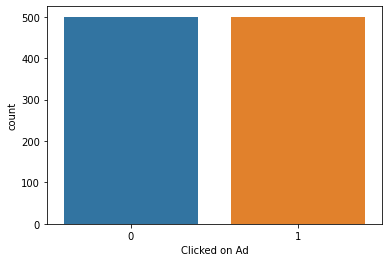

In [29]:
sns.countplot(data["Clicked on Ad"])

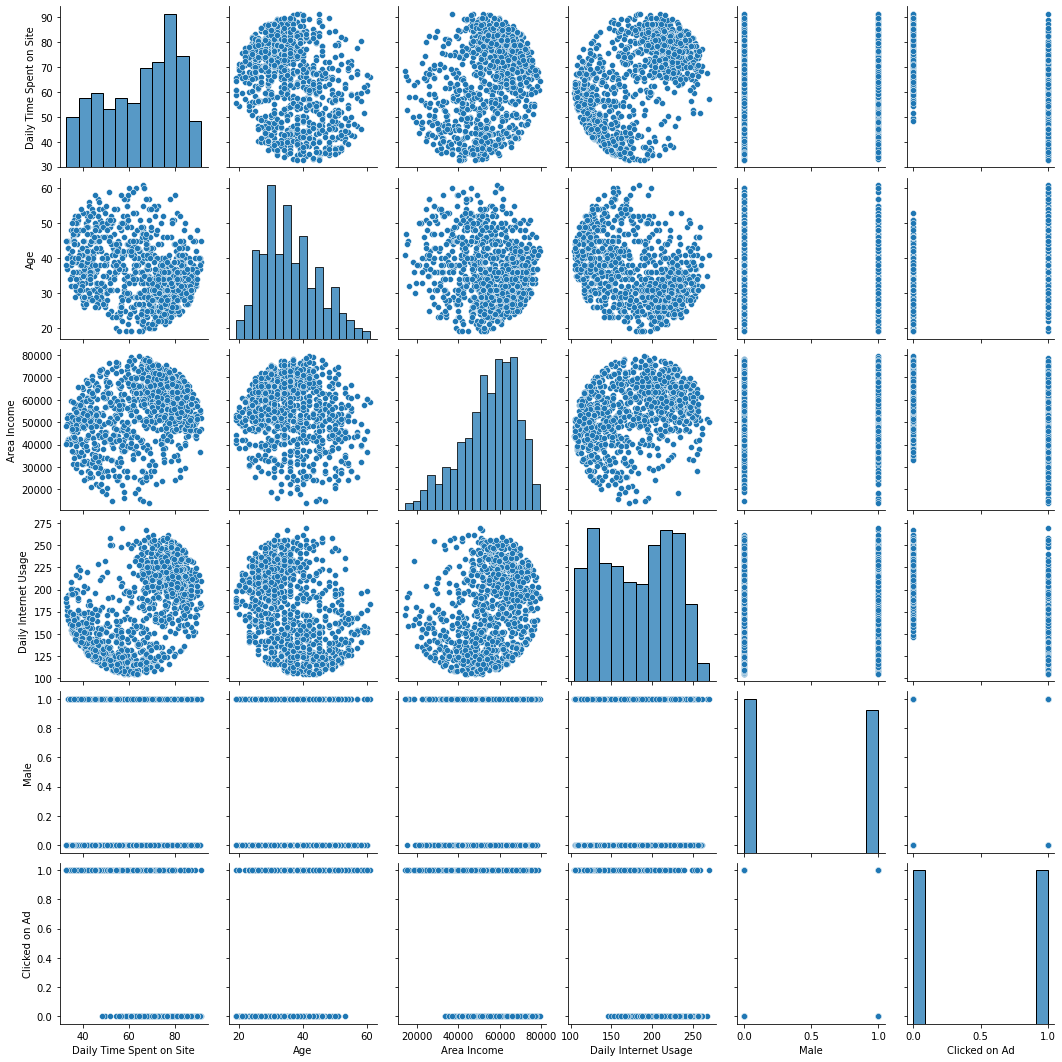

In [30]:
sns.pairplot(data)

### Remove columns that are not relevant

In [79]:
data=data.drop(["Ad Topic Line","City"],axis=1)

In [90]:
for i in [data.columns,data.dtypes]:
    print(f"{i}")

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male', 'Country', 'Timestamp',
       'Clicked on Ad'],
      dtype='object')
Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object


In [51]:
X=data.iloc[:,0:5]

In [52]:
X

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
0,68.95,35,61833.90,256.09,0
1,80.23,31,68441.85,193.77,1
2,69.47,26,59785.94,236.50,0
3,74.15,29,54806.18,245.89,1
4,68.37,35,73889.99,225.58,0
...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1
996,51.30,45,67782.17,134.42,1
997,51.63,51,42415.72,120.37,1
998,55.55,19,41920.79,187.95,0


In [53]:
y=data.iloc[:,7]

In [54]:
y

0      0
1      0
2      0
3      0
4      0
      ..
995    1
996    1
997    1
998    0
999    1
Name: Clicked on Ad, Length: 1000, dtype: int64

-- Split the data into **Train Test Split** for model **training** and **prediction**

In [55]:
X_train,X_test,y_train,y_test=sklearn.model_selection.train_test_split(X,y,test_size=0.2,random_state=2)

In [56]:
X_train.shape

(800, 5)

In [57]:
X_test.shape

(200, 5)

In [58]:
y_train.shape

(800,)

In [59]:
y_test.shape

(200,)

- Model Definition
- Model Prediction
- Model Fit
- Model Predict

In [60]:
log=sklearn.linear_model.LogisticRegression(C=0.01,random_state=2)

In [61]:
log

LogisticRegression(C=0.01, random_state=2)

In [62]:
log.fit(X_train,y_train)

LogisticRegression(C=0.01, random_state=2)

In [66]:
y_pred=log.predict(X_test)

In [67]:
sklearn.metrics.accuracy_score(y_test,y_pred)

0.94

In [69]:
print(sklearn.metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       107
           1       0.93      0.95      0.94        93

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



In [70]:
print(sklearn.metrics.f1_score(y_test,y_pred))

0.9361702127659575
